<a href="https://colab.research.google.com/github/GimenesPaula/GimenesPaula/blob/main/Celu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#Dominant Color
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from collections import Counter
import pprint

In [85]:
#Image Difference with OpenCV and Python
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils

In [86]:
#antes
from google.colab import files
imagem = files.upload()
filename2 = next(iter(imagem))

Saving 241AC3-09D.jpg to 241AC3-09D.jpg


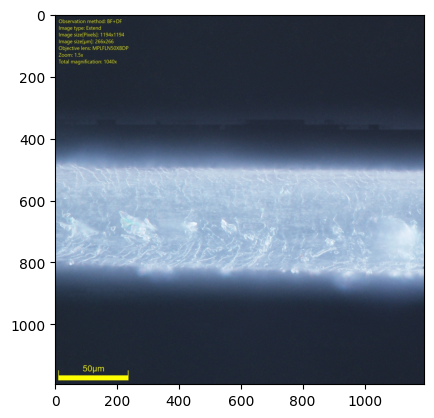

In [87]:
antes = cv2.imread(filename2)
img = cv2.cvtColor(antes, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [88]:
# Carrega Depois
from google.colab import files
imagem = files.upload()
filename = next(iter(imagem))

Saving 241AC3-14D depois 2.jpg to 241AC3-14D depois 2.jpg


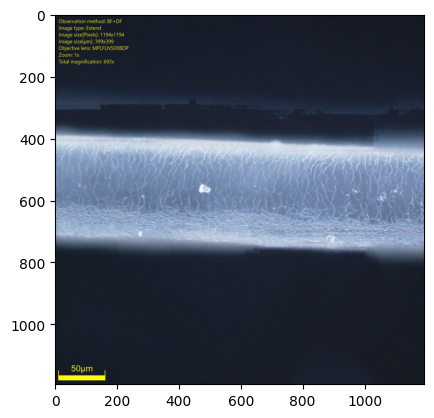

In [89]:
depois = cv2.imread(filename)
img2 = cv2.cvtColor(depois, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

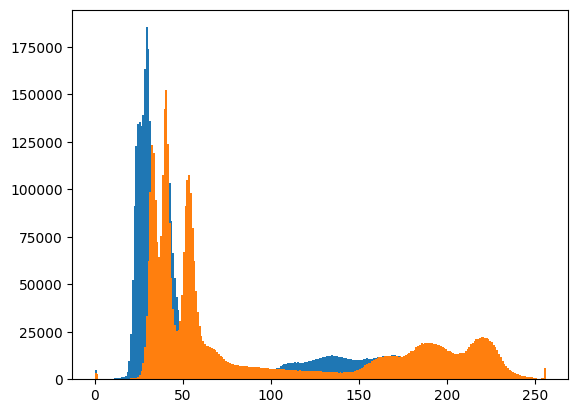

In [90]:
plt.hist(depois.ravel(),bins = 256, range = [0,256]) #azul
plt.hist(antes.ravel(),bins = 256, range = [0,256])  #Laranja
plt.show()

In [91]:
#Comparar Antes e depois
gray_image_antes = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image_depois = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [92]:
args = vars(ap.parse_args(['--first', filename2, '--second', filename]))

In [93]:
(score, diff) = compare_ssim(gray_image_depois, gray_image_antes, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.673227078057336


In [94]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

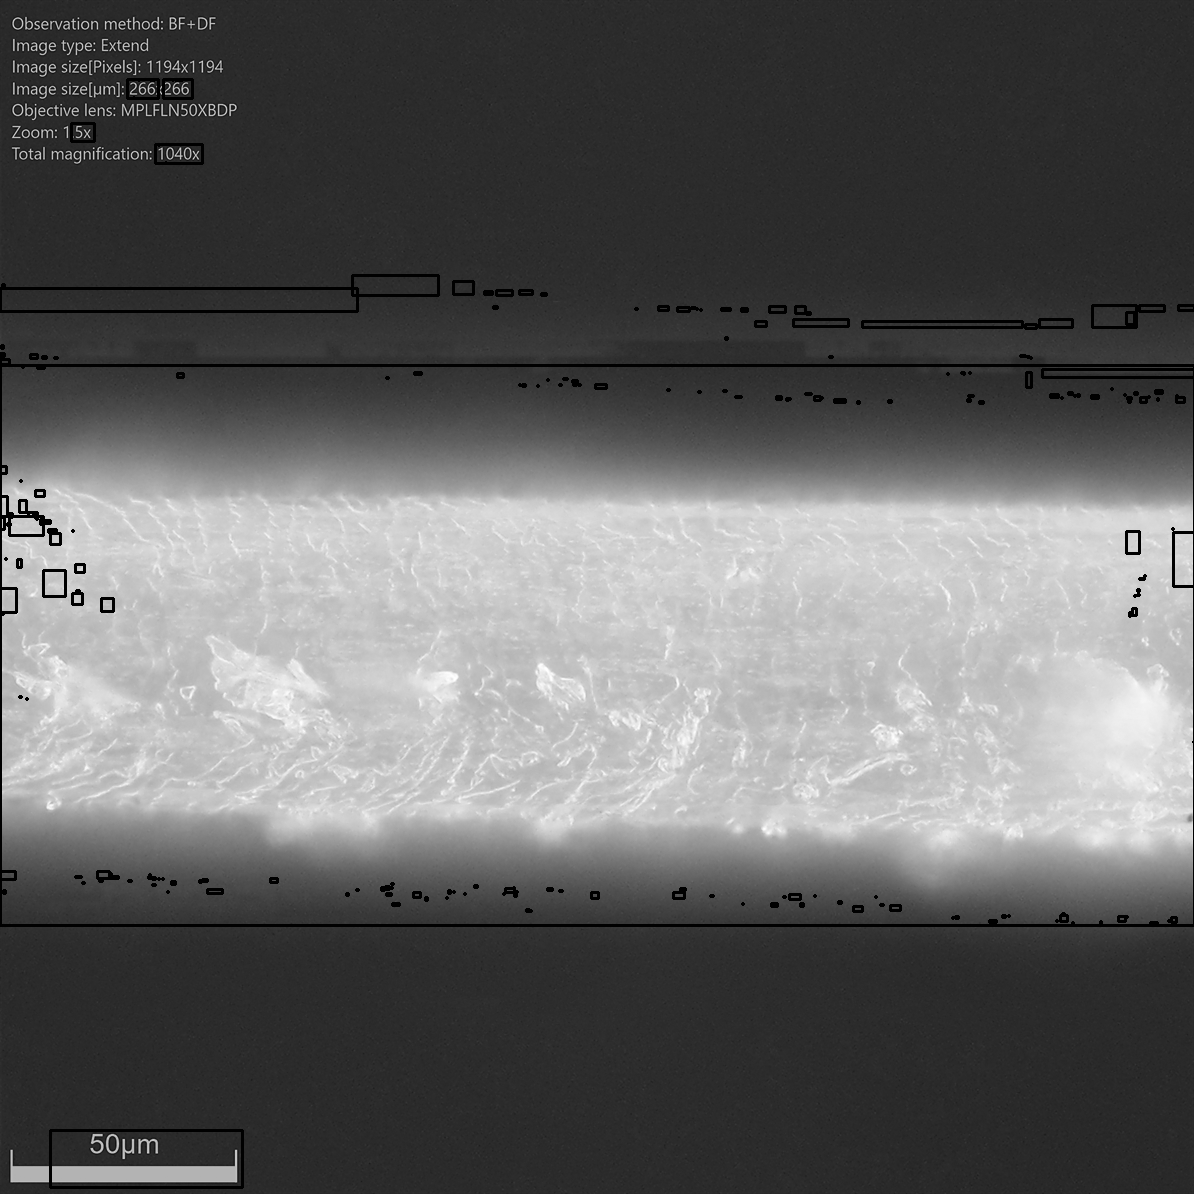

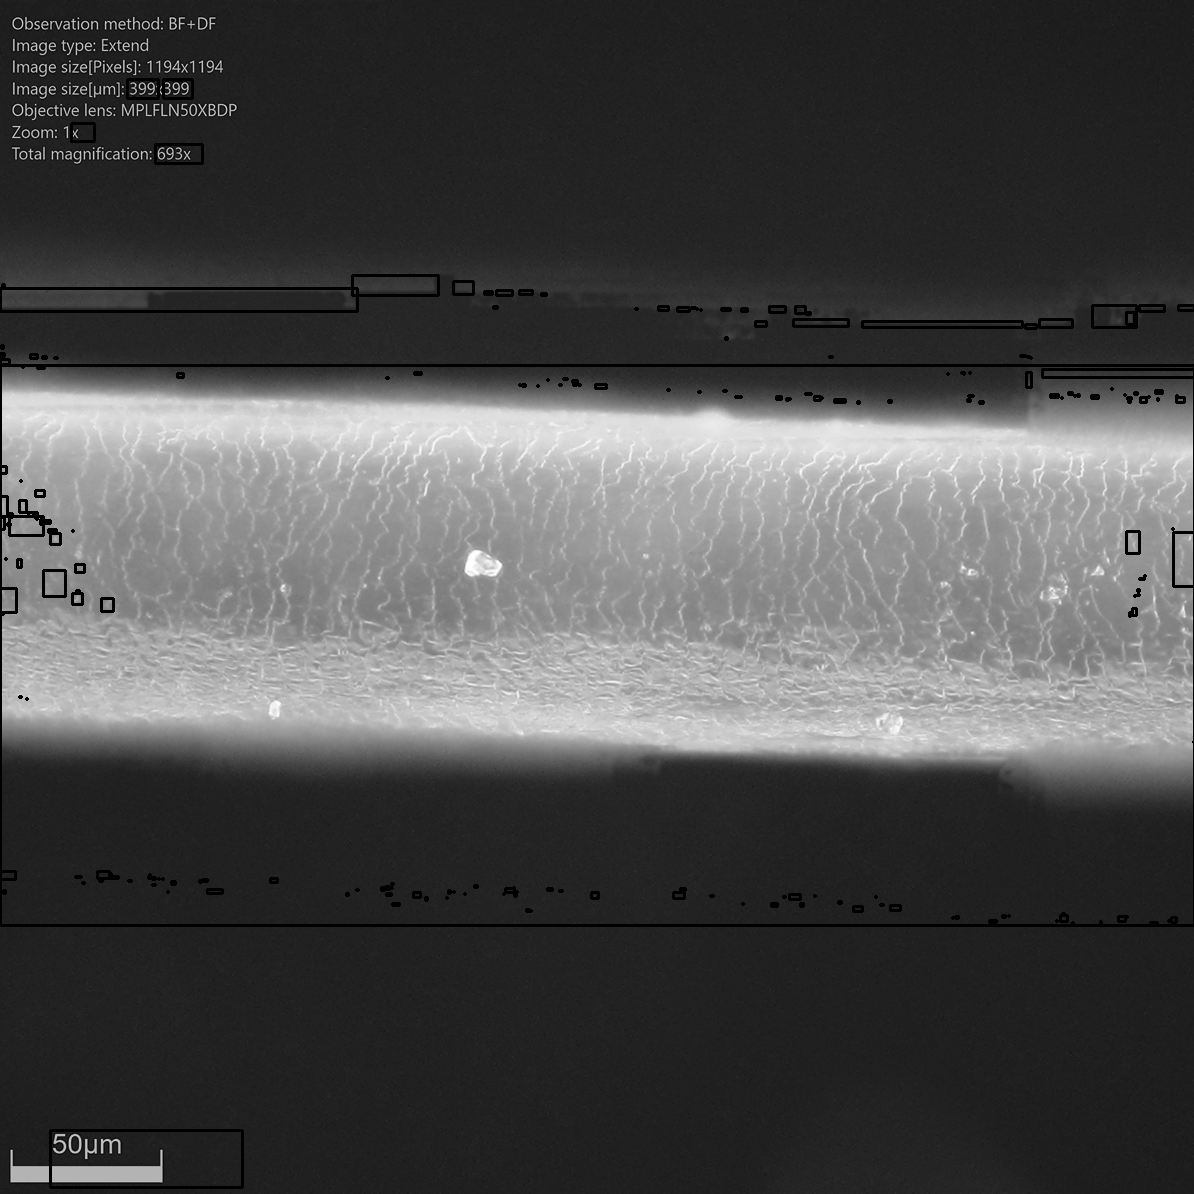

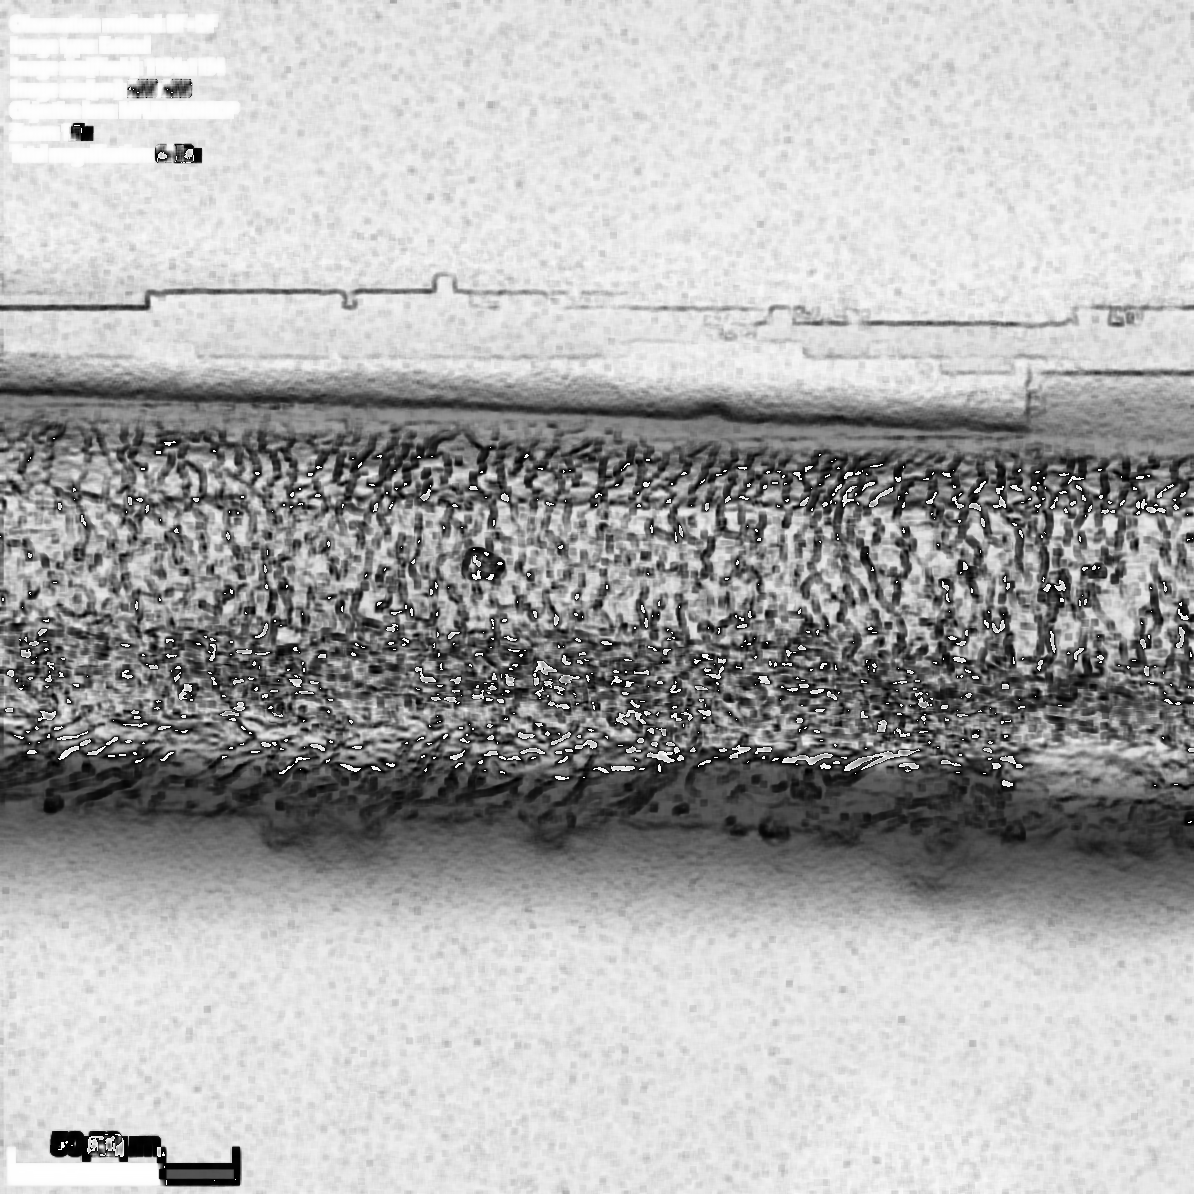

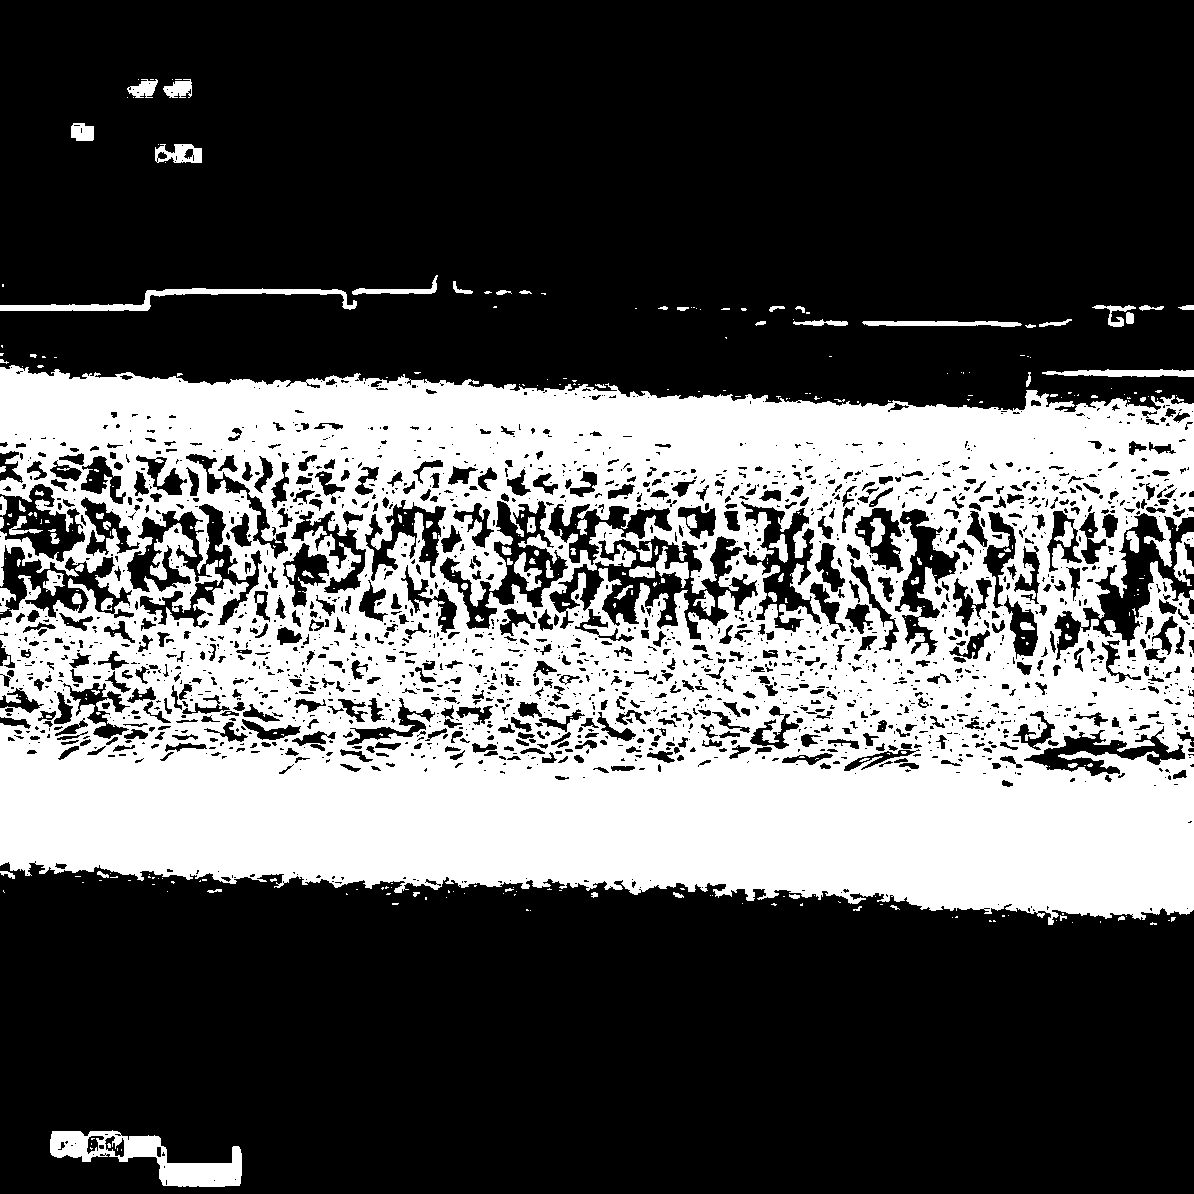

In [96]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(gray_image_depois, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(gray_image_antes, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
cv2_imshow(gray_image_antes)
cv2_imshow(gray_image_depois)
cv2_imshow(diff)
cv2_imshow(thresh)


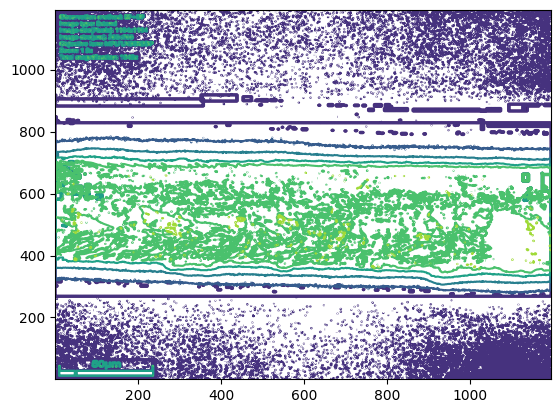

In [97]:
antes1 = plt.contour(gray_image_antes, origin = "image")

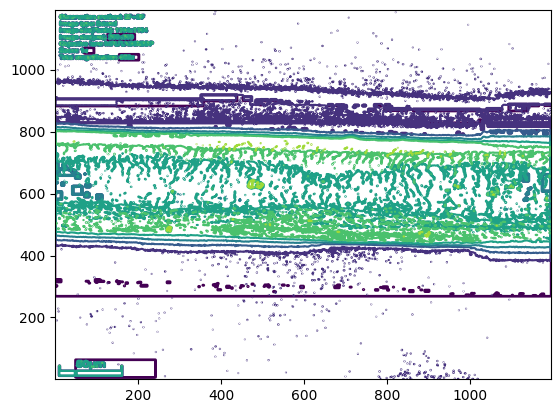

In [98]:
depois1 = plt.contour(gray_image_depois, origin = "image")

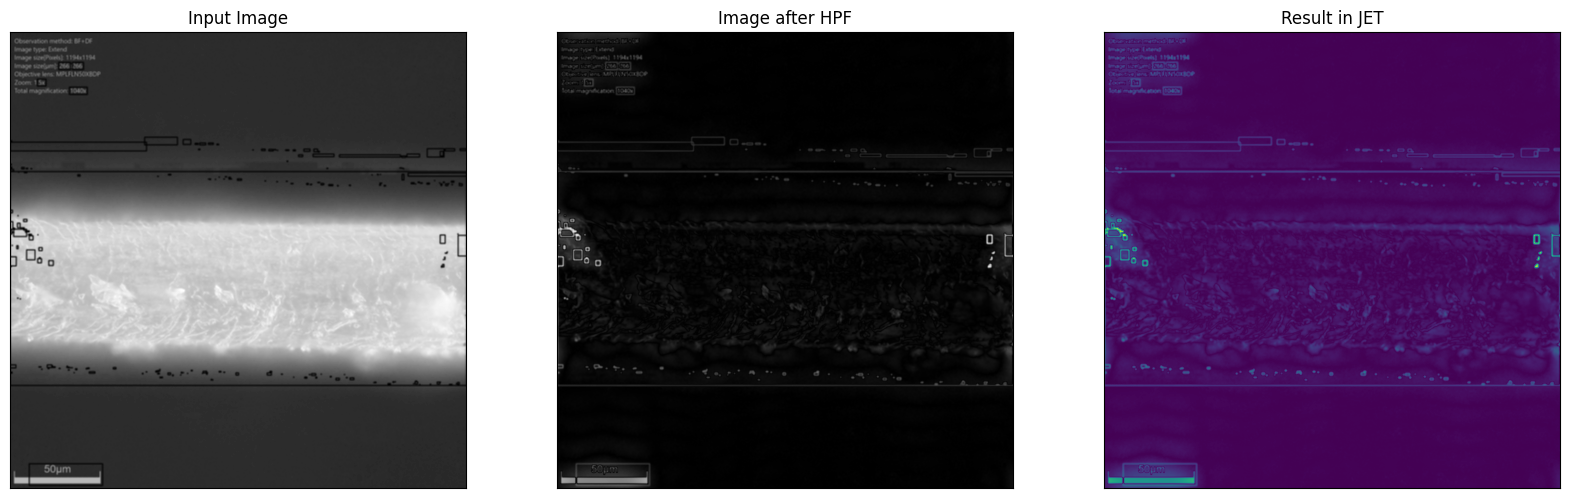

In [99]:
#Antes
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv2.blur(gray_image_antes,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

#This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

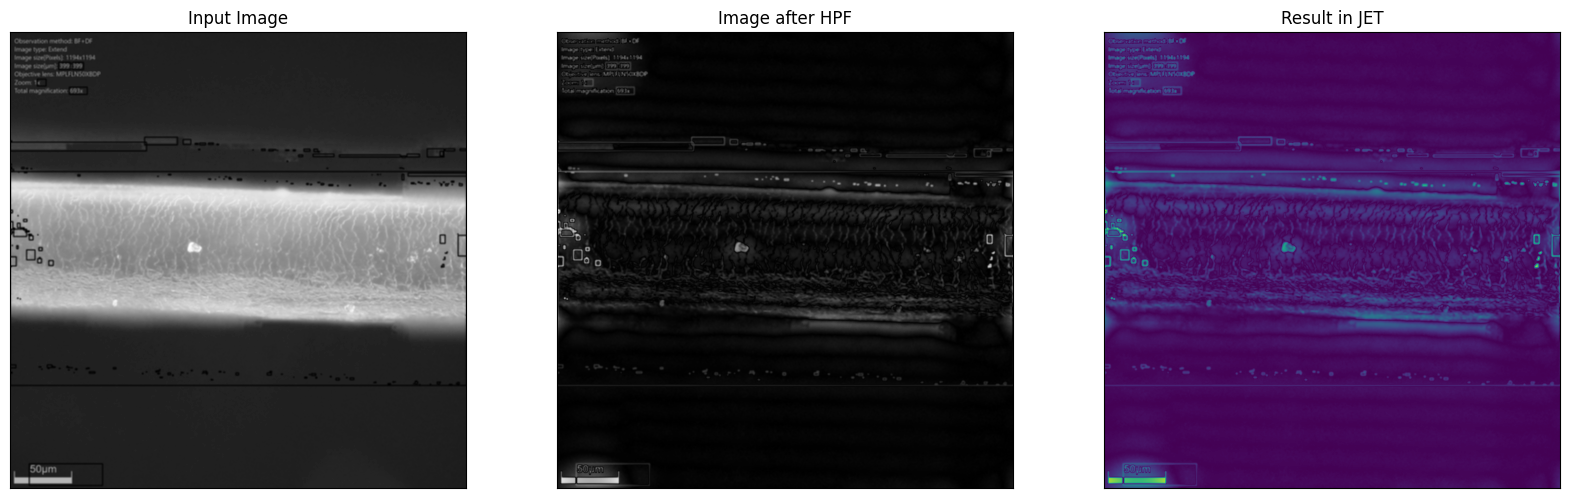

In [100]:
#Antes
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur2 = cv2.blur(gray_image_depois,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur2)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

#This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges
rows, cols = imBlur2.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back2 = np.fft.ifft2(f_ishift)
img_back2 = np.abs(img_back2)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back2, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back2)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

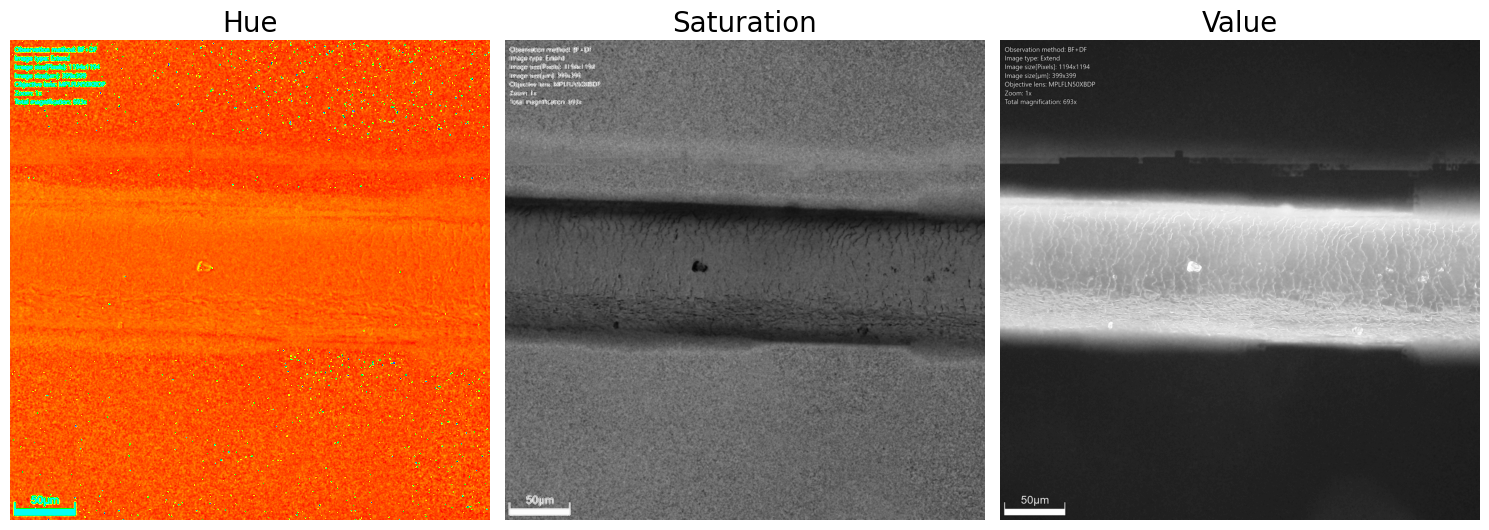

In [101]:
def display_as_hsv(img):

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsv_list = ['Hue','Saturation','Value']
    fig, ax = plt.subplots(1, 3, figsize=(15,7), sharey = True) ##the figure has 1 row, 3 columns.

    ax[0].imshow(img_hsv[:,:,0], cmap = 'hsv')
    ax[0].set_title(hsv_list[0], fontsize = 20)
    ax[0].axis('off')


    ax[1].imshow(img_hsv[:,:,1], cmap = 'gray')
    ax[1].set_title(hsv_list[1], fontsize = 20)
    ax[1].axis('off')


    ax[2].imshow(img_hsv[:,:,2], cmap = 'gray')
    ax[2].set_title(hsv_list[2], fontsize = 20)
    ax[2].axis('off')

    fig.tight_layout()
display_as_hsv(img2)